In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

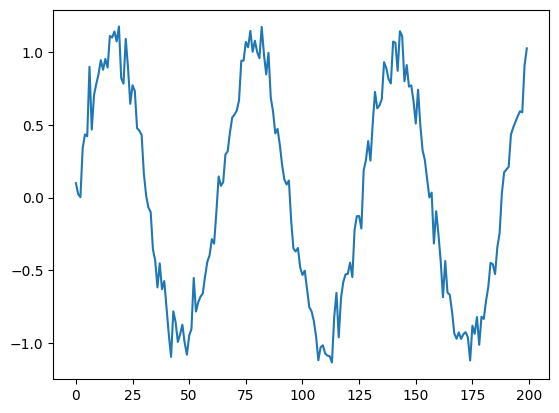

In [2]:
series = np.sin(0.1*np.arange(200))
noise = np.random.randn(200) * 0.1
series = series+ noise
plt.plot(series);

In [3]:
# Costruiamo il dataset dalla serie
T = 10
D = 1
x = []
y = []
for t in range(len(series) -T):
    piece = series[t:t+T]
    x.append(piece)
    ground_truth = series[t+T]
    y.append(ground_truth)

x = np.array(x).reshape(-1, T, D)
y = np.array(y).reshape(-1, 1)
N = len(x)

x.shape, y.shape

((190, 10, 1), (190, 1))

In [4]:
# RNN "Semplice"
i = Input(shape=(T, D))
out = SimpleRNN(5, activation="tanh")(i)
out = Dense(1)(out)
model = Model(i, out)
model.compile(loss="mse", optimizer=Adam(learning_rate=0.1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
r = model.fit(
    x[:N//2], y[:N//2], validation_data=(x[N//2:], y[N//2:]), epochs=80)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.7115 - val_loss: 0.1052
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0974 - val_loss: 0.0741
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0689 - val_loss: 0.0449
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0461 - val_loss: 0.0446
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0420 - val_loss: 0.0504
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - val_loss: 0.0411
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0370 - val_loss: 0.0452
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0317 - val_loss: 0.0324
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0230 - val_loss: 0.0287
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0204 - val_loss: 0.0298
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0209 - val_loss: 0.0323
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0204 - val_loss: 0.0308


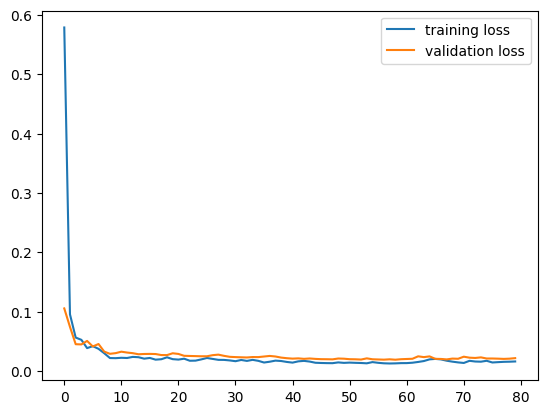

In [6]:
plt.plot(r.history["loss"], label="training loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend();

In [7]:
# Forecasting errato
validation_target = y[N//2:]
predictions = []

i = N//2
while len(predictions) < len(validation_target):
    p = model.predict(x[i].reshape(1, T, D), verbose=False)[0, 0]
    predictions.append(p)
    i +=1

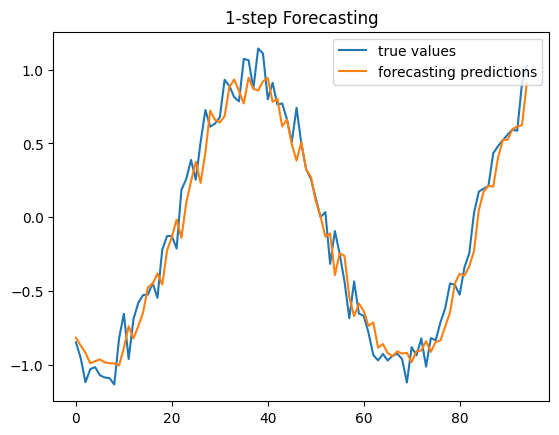

In [8]:
plt.plot(validation_target, label="true values")
plt.plot(predictions, label="forecasting predictions")
plt.title("1-step Forecasting")
plt.legend()

In [9]:
# Forecasting Autoregressivo
validation_target = y[N//2:]
predictions = []

last_x = x[N//2]
while len(predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, D), verbose=False)[0, 0]
    predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

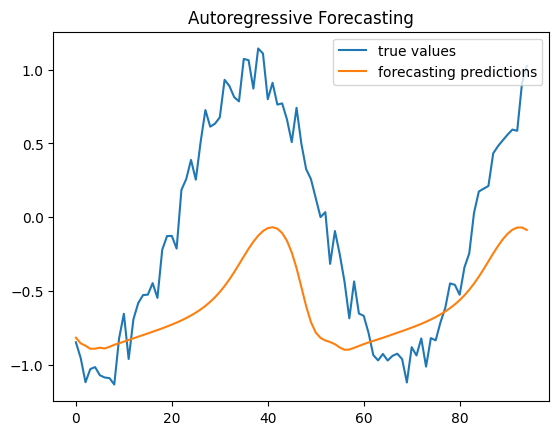

In [10]:
plt.plot(validation_target, label="true values")
plt.plot(predictions, label="forecasting predictions")
plt.title("Autoregressive Forecasting")
plt.legend()